In [4]:
#импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import scipy
from scipy import stats
from scipy.stats import levene
import numpy as np
import sklearn
from sklearn import datasets
from scipy.stats import bartlett
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import chi2_contingency
import statistics
from random import random

In [5]:
#импорт данных
df = pd.read_excel('variant_40.xlsx', sheet_name='v40_5')
df = pd.DataFrame(df)
df.head()

,Group,Value
0,A,1
1,A,0
2,A,1
3,A,0
4,A,1


In [6]:
#Создание таблицы сопряженности. Подсчет 0 и 1.
contigency= pd.crosstab(df['Group'], df['Value'])
contigency

Value,0,1
Group,,
A,2,3
B,3,2
C,1,4


In [7]:
#хи-квадрат
chi2, p, dof, expected = chi2_contingency(contigency)
print (f'Chi-square Statistic : {chi2} ,p-value: {p}', {dof})

Chi-square Statistic : 1.6666666666666665 ,p-value: 0.4345982085070783 {2}


In [8]:
def povtor(trials):
    A_0 = 0
    A_1 = 0
    B_0 = 0
    B_1 = 0
    C_0 = 0
    C_1 = 0
    while (A_0 + B_0 + C_0) == 0 or (A_1 + B_1 + C_1) == 0:
        A_0 = 0
        A_1 = 0
        B_0 = 0
        B_1 = 0
        C_0 = 0
        C_1 = 0

        for trial in range(0, trials):
            if random() < .41: # 1st region
                A_0 += 1
            else:
                A_1 += 1
            if random() < .61: # 1st region
                B_0 += 1
            else:
                B_1 += 1
            if random() < .21: # 1st region
                C_0 += 1
            else:
                C_1 += 1
                    
    df_random = pd.DataFrame(
    {
     '0': [A_0, B_0, C_0],
     '1': [A_1, B_1, C_1]
    })
    
    df_random = df_random.astype(int)
    chi2, p, dof, expected = chi2_contingency(df_random)
    return p

def percent(data, percent):
    
    if percent == 70:
        data.sort()
        p_70 = []
        for i in range(int(len(data) * 0.7)):
            p_70.append(data[i])
        return statistics.mean(p_70)
    
    if percent == 80:
        data.sort()
        p_80 = []
        for i in range(int(len(data) * 0.8)):
            p_80.append(data[i])
        return statistics.mean(p_80)
    
    if percent == 90:
        data.sort()
        p_90 = []
        for i in range(int(len(data) * 0.9)):
            p_90.append(data[i])
        return statistics.mean(p_90)

In [9]:
%%time
list_of_p = []
list_of_p_m_70 = []
list_of_p_m_80 = []
list_of_p_m_90 = []
perc_list = [70, 80, 90]
for perc in perc_list:
    for x in range(6, 58, 1):
        for i in range(5000):
            list_of_p.append(povtor(x))
        if perc == 70:
            list_of_p_m_70.append(percent(list_of_p, perc))
            list_of_p = []
        if perc == 80:
            list_of_p_m_80.append(percent(list_of_p, perc))
            list_of_p = []
        if perc == 90:
            list_of_p_m_90.append(percent(list_of_p, perc))
            list_of_p = []

Wall time: 7min 56s


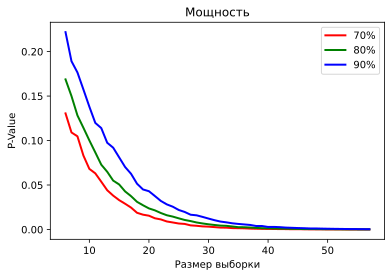

In [29]:
x = list(range(6, 58, 1))
plt.plot(x, list_of_p_m_70, color='red', linewidth=2, label = '70%')
plt.plot(x, list_of_p_m_80, color='green', linewidth=2, label = '80%')
plt.plot(x, list_of_p_m_90, color='blue', linewidth=2, label = '90%')
plt.xlabel('Размер выборки')
plt.ylabel('P-Value')
plt.title('Мощность')
plt.legend()
plt.show()

In [30]:
#значения для 70% (p < 0.05) 
min_70 = list(filter(lambda x: x > 0.05, list_of_p_m_70))
min_70

[0.13054103014619772,
 0.10909752991019009,
 0.1047602925094259,
 0.08318548238739665,
 0.06813653541631252,
 0.0631204439477409,
 0.05372488448805277]

In [31]:
#значения для 80% (p < 0.05) 
min_80 = list(filter(lambda x: x > 0.05, list_of_p_m_80))
min_80

[0.16876195498927088,
 0.1499967454433263,
 0.12826027629525466,
 0.11439608154131838,
 0.10017880796419217,
 0.08664362916237782,
 0.07287730399110029,
 0.06488031200477716,
 0.05496975751771191,
 0.05065042964827035]

In [32]:
#значения для 90% (p < 0.05) 
min_90 = list(filter(lambda x: x > 0.05, list_of_p_m_90))
min_90

[0.2218621769815857,
 0.18919280812738692,
 0.17654750325456556,
 0.15745172420588083,
 0.138090722852184,
 0.11980954807882992,
 0.11402049185726384,
 0.09749710130962383,
 0.09197855778324111,
 0.08112008590336636,
 0.07026734585659881,
 0.06261435229073645,
 0.051495117605763446]